
# **Lab #1: การจัดการข้อมูลพื้นฐาน**
## **วัตถุประสงค์**
1. เรียนรู้การใช้งาน Python เบื้องต้นสำหรับการจัดการข้อมูล
2. เรียนรู้การใช้ไลบรารีสำคัญ เช่น Pandas และ GeoPandas
3. เรียนรู้การอ่าน/เขียนและสำรวจข้อมูลทางภูมิศาสตร์ (GeoData)

---
หมายเหตุ บางครั้งอาจจะเจอ Bug. ขอจงอย่าย่อท้อ ให้ใช้ทรัพยากรที่มีอยู่ในการจัดการแก้ไขปัญหา เช่น  Gemini หรือ ChatGPT แต่ทั้งนี้ต้องทำความเข้าใจกับคำตอบที่ได้ เพราะบางครั้ง AI ก็ให้คำตอบแบบงงๆ



## **1. การเริ่มต้นใช้งาน Google Colab**
### **1.1 เชื่อมต่อ Google Drive**
ก่อนอื่น ให้เชื่อมต่อ Google Drive เพื่อจัดเก็บข้อมูลของคุณ
    

In [ ]:

from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).



### **1.2 ติดตั้งไลบรารีที่จำเป็น**
ติดตั้งไลบรารีที่จำเป็นสำหรับการจัดการข้อมูลและการวิเคราะห์ข้อมูลภูมิศาสตร์
    

In [ ]:

!pip install pandas geopandas matplotlib



## **2. การจัดการข้อมูลตารางด้วย Pandas**
### **2.1 สร้าง DataFrame ตัวอย่าง**
ลองสร้าง DataFrame ข้อมูลประชากรของประเทศในภูมิภาค ASEAN
    

In [ ]:

import pandas as pd

# สร้าง DataFrame ตัวอย่าง
data = {
    'ประเทศ': ['ไทย', 'ลาว', 'กัมพูชา', 'เวียดนาม'],
    'ประชากร (ล้าน)': [69.8, 7.1, 16.5, 97.3],
    'พื้นที่ (ตร.กม.)': [513120, 236800, 181035, 331210]
}
df = pd.DataFrame(data)

# แสดงข้อมูล
print(df)

# คำนวณความหนาแน่นประชากร
df['ความหนาแน่นประชากร (คน/ตร.กม.)'] = df['ประชากร (ล้าน)'] * 1_000_000 / df['พื้นที่ (ตร.กม.)']
print(df)


     ประเทศ  ประชากร (ล้าน)  พื้นที่ (ตร.กม.)
0       ไทย            69.8            513120
1       ลาว             7.1            236800
2   กัมพูชา            16.5            181035
3  เวียดนาม            97.3            331210
     ประเทศ  ประชากร (ล้าน)  พื้นที่ (ตร.กม.)  ความหนาแน่นประชากร (คน/ตร.กม.)
0       ไทย            69.8            513120                      136.030558
1       ลาว             7.1            236800                       29.983108
2   กัมพูชา            16.5            181035                       91.142597
3  เวียดนาม            97.3            331210                      293.771323



### **2.2 การอ่านไฟล์ข้อมูล CSV**
- ให้นักศึกษาหาข้อมูลที่น่าสนใจในรูปแบบ  CSV
- โหลด File .csv เข้า google drive ของนักศึกษา
- จากนั้นให้ไปดูใน file_path ในรูป โฟลเดอร์ ด้านซ้ายบน
    

In [25]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [26]:
import pandas as pd # Import the pandas library

# ตัวอย่างการอ่านไฟล์ CSV
file_path = '/content/drive/MyDrive/GE234_2 2567/data.csv'
geo_df = pd.read_csv(file_path)

# ตรวจสอบข้อมูล
print(geo_df.head())
print(geo_df.info())

   Year Phuket visitor Phuket Revenue (m baht)
0  1988        884,293                     NaN
1  1989        971,683                6,705.89
2  1990      1,254,215                8,574.27
3  1991      1,208,594               10,699.99
4  1992      1,633,496               33,891.17
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 3 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Year                     37 non-null     int64 
 1   Phuket visitor           37 non-null     object
 2   Phuket Revenue (m baht)  36 non-null     object
dtypes: int64(1), object(2)
memory usage: 1020.0+ bytes
None


**ตอบคำถาม 5 คะแนน**

จงใช้สันชาตญาณนักภูมิศาสตร์ อธิบายข้อมูลที่ได้ ว่าเป็นข้อมูลเกี่ยวกับอะไร


**ตอบ **data.csv ประกอบด้วยข้อมูลสถิติเกี่ยวกับการท่องเที่ยวของภูเก็ต แสดงปีในรูปแบบตัวเลขและข้อมูลผู้เยี่ยมชมกับรายได้ในรูปแบบข้อความ ซึ่งช่วยให้เห็นแนวโน้มการท่องเที่ยวในแต่ละปี



## **3. การจัดการข้อมูลภูมิศาสตร์ด้วย GeoPandas** 5 คะแนน
### **3.1 การอ่าน Shapefile และแสดงผล**
ใช้ข้อมูล Shapefile ที่มีขอบเขตและมีประชากร อาจจะหาจากแหล่งข้อมูลที่ เป็น Opendata เช่น
https://data.humdata.org/dataset/worldpop-population-density-for-thailand

    

In [27]:

import geopandas as gpd

# อ่านไฟล์ Shapefile
shapefile_path = '/content/drive/My Drive/data/Shapefile.shp'
geo_data = gpd.read_file(shapefile_path)

# แสดงข้อมูลเบื้องต้น
print(geo_data.head())
print(geo_data.crs)

# แสดงผลข้อมูลบนแผนที่
geo_data.plot(column='population', cmap='OrRd', legend=True)


DataSourceError: /content/drive/My Drive/data/Shapefile.shp: No such file or directory


## **4. การแสดงผลข้อมูล**
### **4.1 สร้างกราฟด้วย Matplotlib**  5 คะแนน
สร้างกราฟแสดงประชากรของแต่ละประเทศในภูมิภาค ASEAN โดยให้นักศึกษาทดลองหาข้อมูลเอง
    

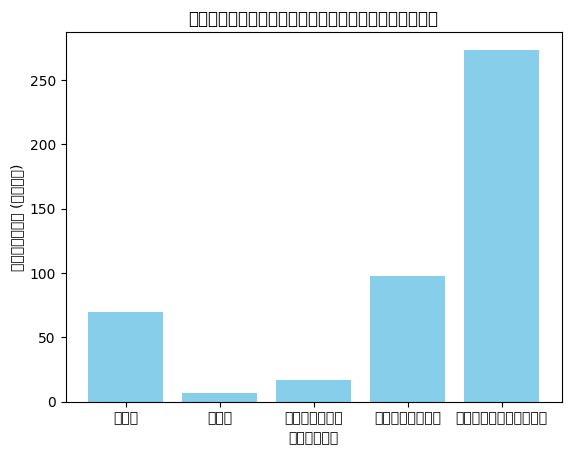

In [29]:

import matplotlib.pyplot as plt

# สร้างกราฟแสดงประชากร
plt.bar(df['ประเทศ'], df['ประชากร (ล้าน)'], color='skyblue')
plt.title('จำนวนประชากรในแต่ละประเทศ')
plt.xlabel('ประเทศ')
plt.ylabel('ประชากร (ล้าน)')
plt.show()



### **4.2 การรวมข้อมูลเชิงพื้นที่และตาราง**
รวมข้อมูล Shapefile กับข้อมูลประชากรเพื่อแสดงข้อมูลประชากรในแต่ละจังหวัด โดยให้นักศึกษาทดลองหาข้อมูลเอง
    

In [12]:

# รวมข้อมูล
merged_data = geo_data.merge(df, left_on='province', right_on='ประเทศ')

# แสดงผลข้อมูลในแผนที่
merged_data.plot(column='ประชากร (ล้าน)', cmap='OrRd', legend=True, figsize=(12, 8))
plt.title('ประชากรในแต่ละจังหวัด')
plt.show()


NameError: name 'geo_data' is not defined


## **โจทย์สำหรับนักศึกษา** 15 คะแนน
1. ลองเพิ่มประเทศใหม่ใน DataFrame พร้อมคำนวณความหนาแน่นประชากร (5 คะแนน)
2. นำไฟล์ Shapefile ของพื้นที่อื่นมาแสดงผลใน GeoPandas (5 คะแนน)
3. ลองสร้างแผนที่ด้วยสีที่แตกต่างกันโดยใช้ค่าอื่น เช่น `area` หรือ `density` (5 คะแนน)

---

### **หมายเหตุ**
- ดาวน์โหลดข้อมูลจากแหล่ง Open Data เช่น [World Bank Open Data](https://data.worldbank.org) หรือ [Thailand Data Catalog](https://data.go.th)
- ใส่เครดิตแหล่งข้อมูลในรายงานของคุณ
    

1.ลองเพิ่มประเทศใหม่ใน DataFrame พร้อมคำนวณความหนาแน่นประชากร



In [30]:
import pandas as pd

# สร้าง DataFrame ตัวอย่าง
data = {
    'ประเทศ': ['ไทย', 'ลาว', 'กัมพูชา', 'เวียดนาม','อินโดนีเซีย'],
    'ประชากร (ล้าน)': [69.8, 7.1, 16.5, 97.3 ,273.50 ],
    'พื้นที่ (ตร.กม.)': [513120, 236800, 181035, 331210,1904569]
}
df = pd.DataFrame(data)

# แสดงข้อมูล
print(df)

# คำนวณความหนาแน่นประชากร
df['ความหนาแน่นประชากร (คน/ตร.กม.)'] = df['ประชากร (ล้าน)'] * 1_000_000 / df['พื้นที่ (ตร.กม.)']
display(df)

        ประเทศ  ประชากร (ล้าน)  พื้นที่ (ตร.กม.)
0          ไทย            69.8            513120
1          ลาว             7.1            236800
2      กัมพูชา            16.5            181035
3     เวียดนาม            97.3            331210
4  อินโดนีเซีย           273.5           1904569


,ประเทศ,ประชากร (ล้าน),พื้นที่ (ตร.กม.),ความหนาแน่นประชากร (คน/ตร.กม.)
0,ไทย,69.8,513120,136.030558
1,ลาว,7.1,236800,29.983108
2,กัมพูชา,16.5,181035,91.142597
3,เวียดนาม,97.3,331210,293.771323
4,อินโดนีเซีย,273.5,1904569,143.602043


### ข้อมูลประชากรและความหนาแน่นประชากรของประเทศต่างๆ:


2. นำไฟล์ Shapefile ของพื้นที่อื่นมาแสดงผลใน GeoPandas

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
                  adm3_name                                     adm3_name1  \
0  Phraborom Maharatchawang  à¸à¸£à¸°à¸à¸£à¸¡à¸¡à¸«à¸²à¸£à¸²à¸à¸§à¸±à¸   
1       Wang Burapha Phirom     à¸§à¸±à¸à¸à¸¹à¸£à¸à¸²à¸ à¸´à¸£à¸¡à¸¢à¹   
2          Wat Ratchabophit                 à¸§à¸±à¸à¸£à¸²à¸à¸à¸à¸´à¸   
3                Samran Rat              à¸ªà¸³à¸£à¸²à¸à¸£à¸²à¸©à¸à¸£à¹   
4          San Chaopho Suea     à¸¨à¸²à¸¥à¹à¸à¹à¸²à¸à¹à¸­à¹à¸ªà¸·à¸­   

  adm3_name2 adm3_name3 adm3_pcode    adm2_name          adm2_name1  \
0       None       None   TH100101  Phra Nakhon  à¸à¸£à¸°à¸à¸à¸£   
1       None       None   TH100102  Phra Nakhon  à¸à¸£à¸°à¸à¸à¸£   
2       None       None   TH100103  Phra Nakhon  à¸à¸£à¸°à¸à¸à¸£   
3       None       None   TH100104  Phra Nakhon  à¸à¸£à¸°à¸à¸à¸£   
4       None       None   TH100105  Phra Nakhon

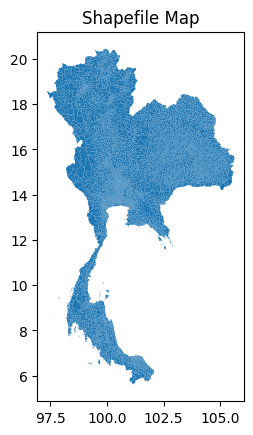

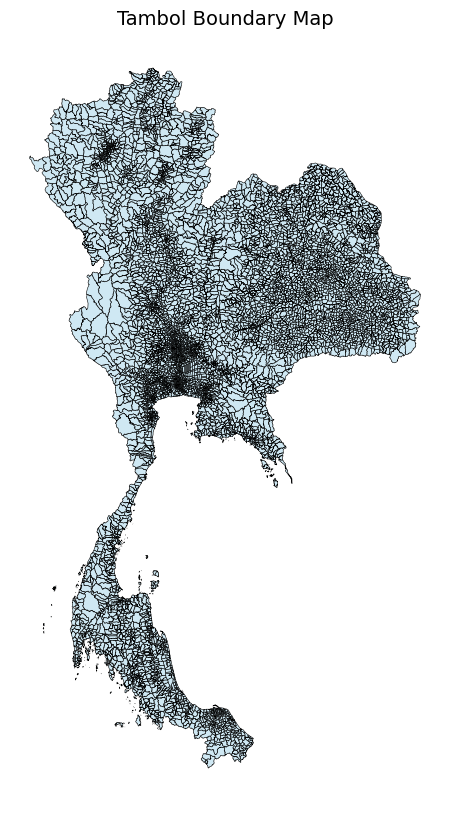

In [31]:

from google.colab import drive
drive.mount('/content/drive')

import geopandas as gpd
import matplotlib.pyplot as plt
import os

folder_path_ge = "/content/drive/MyDrive/GE234_2 2567"


shapefile_path = os.path.join(folder_path_ge, "tambol.shp")
geo_data = gpd.read_file(shapefile_path)

print(geo_data.head())
print(geo_data.crs)

geo_data.plot()
plt.title("Shapefile Map")
plt.show()

import matplotlib.pyplot as plt

plt.rcParams["font.family"] = "DejaVu Sans"

fig, ax = plt.subplots(figsize=(8, 10))

geo_data.plot(
    ax=ax,
    color="#cfe8f3",      # สีฟ้าอ่อน
    edgecolor="black",   # เส้นขอบเขต
    linewidth=0.4
)

ax.set_title("Tambol Boundary Map", fontsize=14)
ax.axis("off")  # ซ่อนแกน

plt.show()

3 .ลองสร้างแผนที่ด้วยสีที่แตกต่างกันโดยใช้ค่าอื่น เช่น area หรือ density

Mounted at /content/drive


/usr/local/lib/python3.12/dist-packages/geopandas/plotting.py:950: UserWarning: Glyph 3614 (\N{THAI CHARACTER PHO PHAN}) missing from font(s) DejaVu Sans.
  ax.figure.canvas.draw_idle()
/usr/local/lib/python3.12/dist-packages/geopandas/plotting.py:950: UserWarning: Glyph 3639 (\N{THAI CHARACTER SARA UEE}) missing from font(s) DejaVu Sans.
  ax.figure.canvas.draw_idle()
/usr/local/lib/python3.12/dist-packages/geopandas/plotting.py:950: UserWarning: Glyph 3657 (\N{THAI CHARACTER MAI THO}) missing from font(s) DejaVu Sans.
  ax.figure.canvas.draw_idle()
/usr/local/lib/python3.12/dist-packages/geopandas/plotting.py:950: UserWarning: Glyph 3609 (\N{THAI CHARACTER NO NU}) missing from font(s) DejaVu Sans.
  ax.figure.canvas.draw_idle()
/usr/local/lib/python3.12/dist-packages/geopandas/plotting.py:950: UserWarning: Glyph 3607 (\N{THAI CHARACTER THO THAHAN}) missing from font(s) DejaVu Sans.
  ax.figure.canvas.draw_idle()
/usr/local/lib/python3.12/dist-packages/geopandas/plotting.py:950: UserW

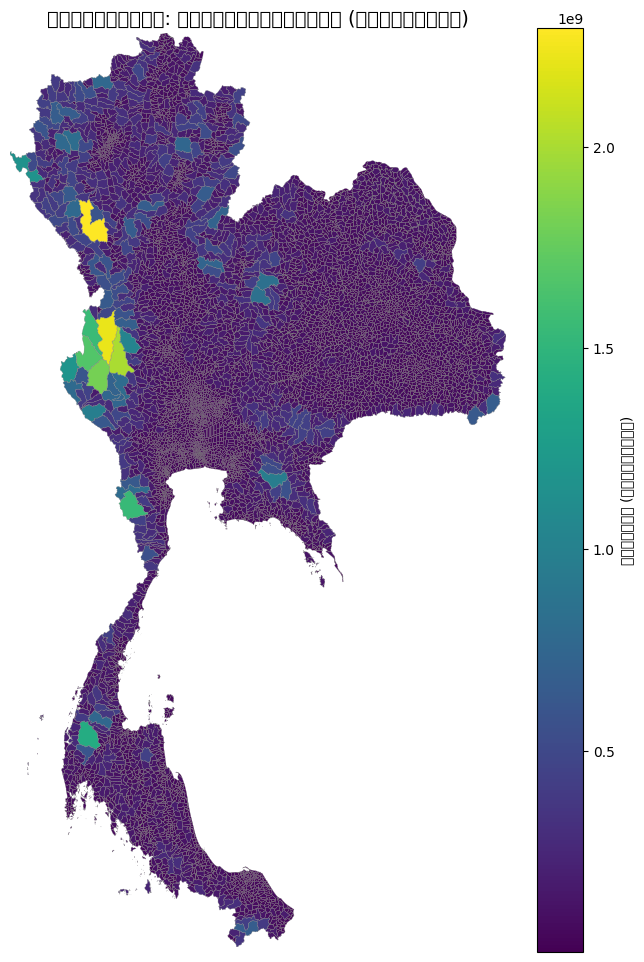

In [13]:
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import os

# ตรวจสอบว่าได้เชื่อมต่อ Google Drive แล้วหรือยัง
# หากยังไม่ได้เชื่อมต่อ หรือมีการ Disconnect โปรดรัน drive.mount('/content/drive') อีกครั้ง
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# กำหนด path ไปยังไฟล์ Shapefile (โปรดตรวจสอบว่าไฟล์ tambol.shp อยู่ในตำแหน่งนี้จริง)
folder_path_ge = "/content/drive/MyDrive/GE234_2 2567"
shapefile_path = os.path.join(folder_path_ge, "tambol.shp")

# ตรวจสอบว่าไฟล์ Shapefile มีอยู่จริงหรือไม่
if not os.path.exists(shapefile_path):
    print(f"ข้อผิดพลาด: ไม่พบไฟล์ Shapefile ที่ {shapefile_path}")
    print("โปรดตรวจสอบว่าไฟล์ tambol.shp อยู่ใน Google Drive ของคุณหรือไม่ และ path ถูกต้องแล้วหรือยัง")
else:
    # อ่านไฟล์ Shapefile (ข้าม geometry ที่อาจมีปัญหา)
    gdf = gpd.read_file(
        shapefile_path,
        engine="pyogrio",
        on_invalid="ignore"
    )

    # กำหนด CRS เดิม (WGS84) หากยังไม่ได้กำหนด และแปลงเป็นหน่วยเมตรเพื่อคำนวณพื้นที่
    if gdf.crs is None or gdf.crs.to_epsg() != 4326:
        gdf = gdf.set_crs(epsg=4326, allow_override=True)
    gdf = gdf.to_crs(epsg=3857) # แปลงเป็นหน่วยเมตร

    # คำนวณพื้นที่ (ตารางเมตร)
    gdf["area"] = gdf.geometry.area

    # สร้างข้อมูลประชากรจำลอง หากคอลัมน์ 'population' ยังไม่มี
    # (โปรดแทนที่ด้วยข้อมูลจริงของคุณหากมี)
    if 'population' not in gdf.columns:
        gdf['population'] = np.random.randint(1000, 50000, size=len(gdf)) * (gdf['area'] / gdf['area'].mean() / 100)
        gdf['population'] = gdf['population'].astype(int)

    # คำนวณความหนาแน่นประชากร (คนต่อตารางกิโลเมตร)
    gdf['population_density_sqkm'] = gdf['population'] / (gdf['area'] / 1_000_000)

    # ===== Plot แผนที่ตามพื้นที่ (area) =====
    fig, ax = plt.subplots(figsize=(8, 12))

    gdf.plot(
        column='area',
        cmap='viridis', # เปลี่ยน cmap เพื่อความหลากหลาย
        legend=True,
        ax=ax,
        edgecolor='gray',
        linewidth=0.2,
        legend_kwds={'label': "พื้นที่ (ตารางเมตร)", 'orientation': "vertical"}
    )

    # กำหนดขอบเขตจากข้อมูลจริง
    minx, miny, maxx, maxy = gdf.total_bounds
    ax.set_xlim(minx, maxx)
    ax.set_ylim(miny, maxy)

    ax.set_title("แผนที่ตำบล: แบ่งตามพื้นที่ (ตารางเมตร)", fontsize=14)
    ax.axis("off") # ซ่อนแกน

    plt.show()

/usr/local/lib/python3.12/dist-packages/geopandas/plotting.py:950: UserWarning: Glyph 3588 (\N{THAI CHARACTER KHO KHWAI}) missing from font(s) DejaVu Sans.
  ax.figure.canvas.draw_idle()
/usr/local/lib/python3.12/dist-packages/geopandas/plotting.py:950: UserWarning: Glyph 3623 (\N{THAI CHARACTER WO WAEN}) missing from font(s) DejaVu Sans.
  ax.figure.canvas.draw_idle()
/usr/local/lib/python3.12/dist-packages/geopandas/plotting.py:950: UserWarning: Glyph 3634 (\N{THAI CHARACTER SARA AA}) missing from font(s) DejaVu Sans.
  ax.figure.canvas.draw_idle()
/usr/local/lib/python3.12/dist-packages/geopandas/plotting.py:950: UserWarning: Glyph 3617 (\N{THAI CHARACTER MO MA}) missing from font(s) DejaVu Sans.
  ax.figure.canvas.draw_idle()
/usr/local/lib/python3.12/dist-packages/geopandas/plotting.py:950: UserWarning: Glyph 3627 (\N{THAI CHARACTER HO HIP}) missing from font(s) DejaVu Sans.
  ax.figure.canvas.draw_idle()
/usr/local/lib/python3.12/dist-packages/geopandas/plotting.py:950: UserWarni

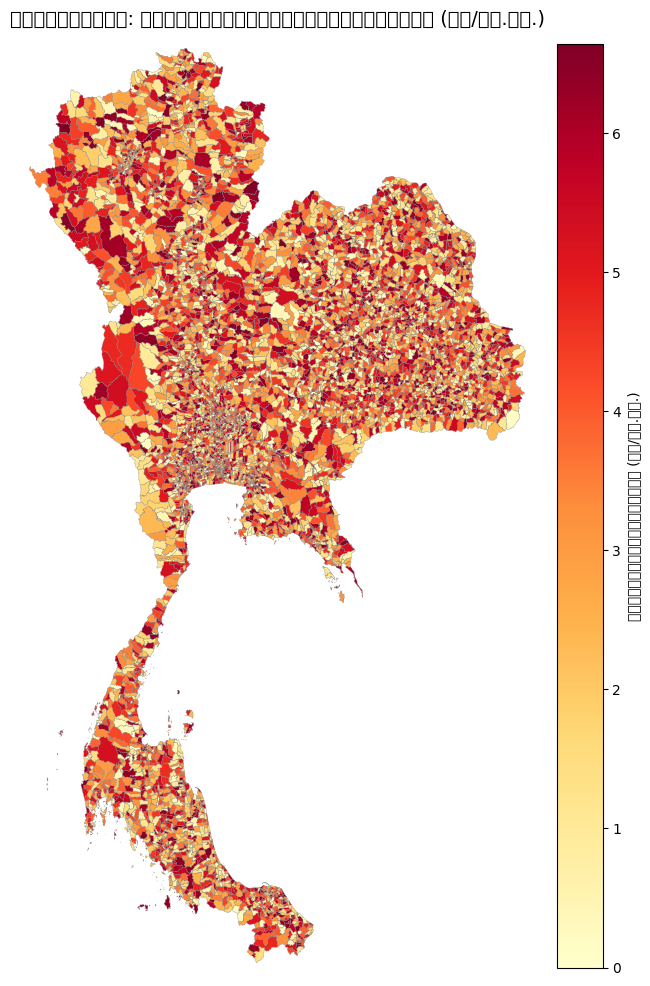

In [32]:
import matplotlib.pyplot as plt

# ตรวจสอบว่า 'gdf' ถูกสร้างขึ้นในเซลล์ก่อนหน้าแล้ว
if 'gdf' in locals() and not gdf.empty:
    # ===== Plot แผนที่ตามความหนาแน่นประชากร (population_density_sqkm) =====
    fig, ax = plt.subplots(figsize=(8, 12))

    gdf.plot(
        column='population_density_sqkm',
        cmap='YlOrRd', # ใช้ cmap ที่แตกต่างออกไป เช่น YlOrRd สำหรับความหนาแน่น
        legend=True,
        ax=ax,
        edgecolor='gray',
        linewidth=0.2,
        legend_kwds={'label': "ความหนาแน่นประชากร (คน/ตร.กม.)", 'orientation': "vertical"}
    )

    # กำหนดขอบเขตจากข้อมูลจริง
    minx, miny, maxx, maxy = gdf.total_bounds
    ax.set_xlim(minx, maxx)
    ax.set_ylim(miny, maxy)

    ax.set_title("แผนที่ตำบล: แบ่งตามความหนาแน่นประชากร (คน/ตร.กม.)", fontsize=14)
    ax.axis("off") # ซ่อนแกน

    plt.show()
else:
    print("ไม่สามารถสร้างแผนที่ความหนาแน่นได้: โปรดรันเซลล์ก่อนหน้าเพื่อโหลดข้อมูล Shapefile")